In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

# Optional for better visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Connect to MySQL (replace with your actual credentials)
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Him01@',
    database='superstore'
)


In [63]:
def fetch_data(query):
    return pd.read_sql(query, conn)


# 📊 Sales & Profit Analysis
## 1. Top 10 Products by Sales
Products with the highest sales are likely high-demand or premium items.

Insight: Focus marketing and inventory efforts on these products to maintain revenue.

C:\Users\PP\AppData\Local\Temp\ipykernel_6956\434498813.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\PP\AppData\Local\Temp\ipykernel_6956\1605762519.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_products, x='TotalSales', y='productName', palette='viridis', hue=None, legend=False)


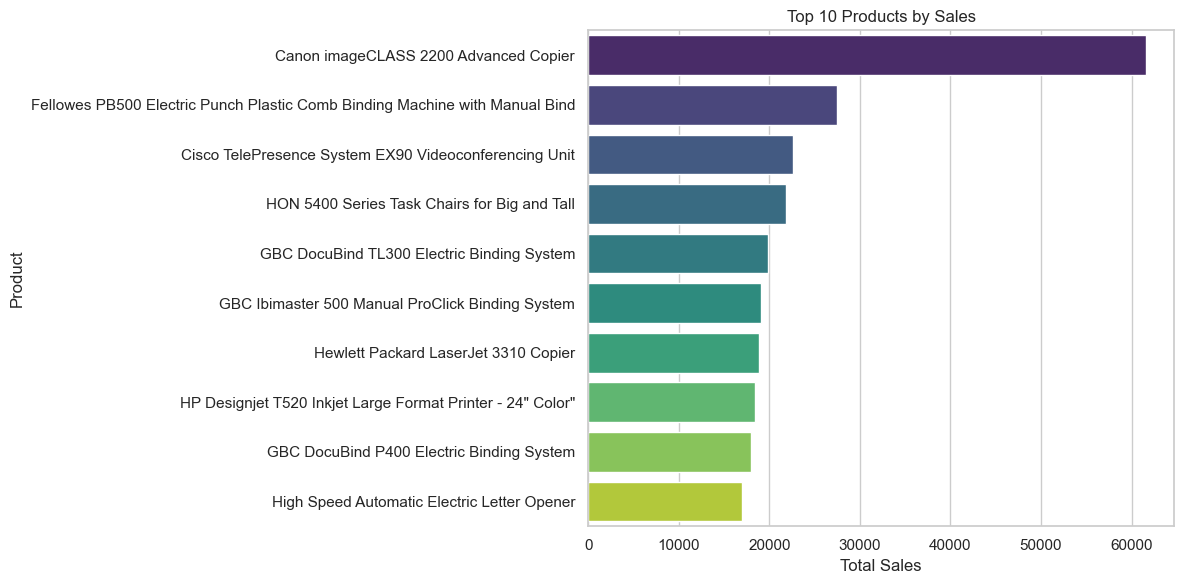

In [52]:
query = """
SELECT productName, SUM(od.sales) AS TotalSales
FROM products p 
JOIN order_details od ON p.productID = od.productID
GROUP BY productName
ORDER BY TotalSales DESC 
LIMIT 10;
"""
df_top_products = fetch_data(query)

# Plot
sns.barplot(data=df_top_products, x='TotalSales', y='productName', palette='viridis', hue=None, legend=False)
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


# 2. 5 Sub-Categories Generating Losses
These sub-categories have low or negative profitability.

Insight: Review pricing, supply chain, or discontinue low-performing items after deeper analysis.

C:\Users\PP\AppData\Local\Temp\ipykernel_6956\434498813.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\PP\AppData\Local\Temp\ipykernel_6956\686185765.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_losses, x='TotalSales', y='subcategory', palette='rocket')


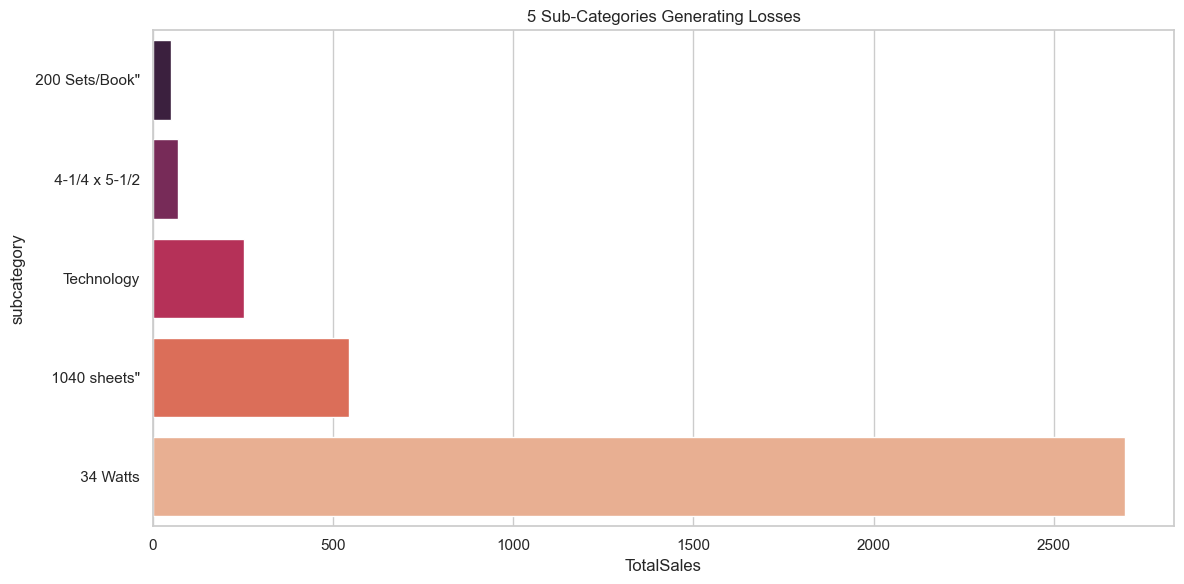

In [53]:
query = """
SELECT subcategory, SUM(od.sales) AS TotalSales
FROM products p 
JOIN order_details od USING(productID)
GROUP BY SubCategory
ORDER BY TotalSales 
LIMIT 5;
"""
df_losses = fetch_data(query)

sns.barplot(data=df_losses, x='TotalSales', y='subcategory', palette='rocket')
plt.title('5 Sub-Categories Generating Losses')
plt.tight_layout()
plt.show()


# 3. Average Profit Margin per Category
Identifies the most profitable product categories.

Insight: Boost investment in high-margin categories to improve overall profitability.

C:\Users\PP\AppData\Local\Temp\ipykernel_6956\434498813.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\PP\AppData\Local\Temp\ipykernel_6956\2365587787.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_margin, x='profit_margin', y='category', palette='coolwarm')


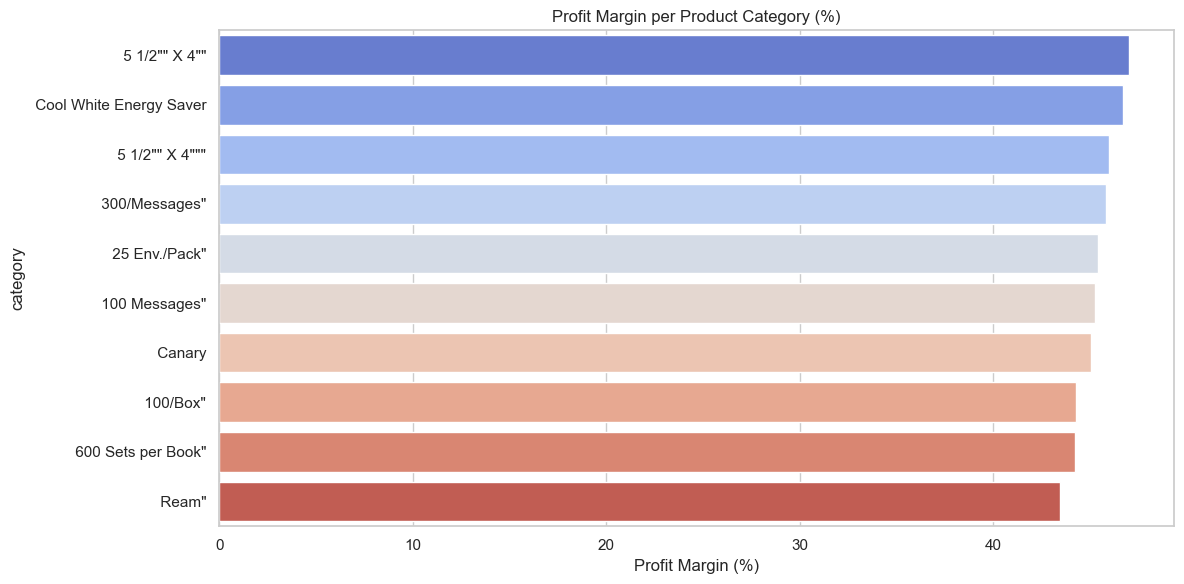

In [64]:
query = """
SELECT category, SUM(profit)/SUM(sales)*100 AS profit_margin
FROM products p 
JOIN order_details od USING(productId)
GROUP BY Category
ORDER BY profit_margin DESC limit 10;
"""
df_margin = fetch_data(query)

sns.barplot(data=df_margin, x='profit_margin', y='category', palette='coolwarm')
plt.title('Profit Margin per Product Category (%)')
plt.xlabel('Profit Margin (%)')
plt.tight_layout()
plt.show()


# 👥 Customer & Region Insights
## 4. Customer Segments by Revenue and Profit
Segments like "Corporate", "Home Office", or "Consumer" compared on sales & profit.

Insight: Target top-performing segments with loyalty programs or exclusive deals.

C:\Users\PP\AppData\Local\Temp\ipykernel_6956\434498813.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


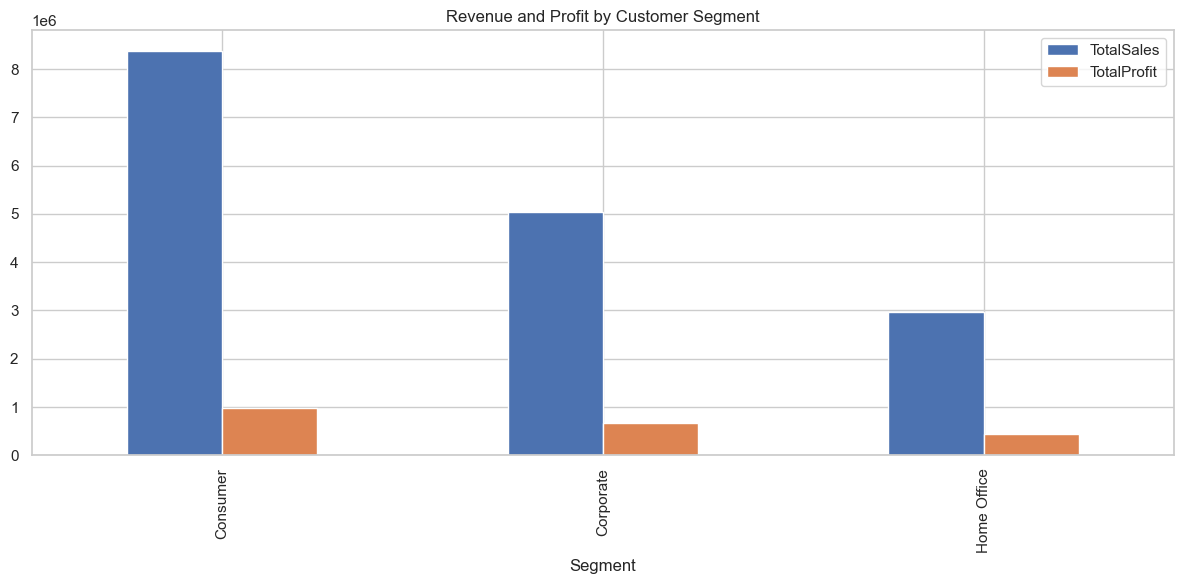

In [55]:
query = """
SELECT c.Segment, SUM(od.Sales) AS TotalSales, SUM(od.Profit) AS TotalProfit 
FROM Order_Details od
JOIN Orders o ON od.OrderID = o.OrderID
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.Segment
ORDER BY TotalSales DESC;
"""
df_segment = fetch_data(query)

df_segment.plot(x='Segment', kind='bar', stacked=False, y=['TotalSales', 'TotalProfit'])
plt.title('Revenue and Profit by Customer Segment')
plt.tight_layout()
plt.show()


# 5. Top 5 Customers by Profit
Highlights your most profitable customers.

Insight: Retain these customers with personalized engagement and early product access.

C:\Users\PP\AppData\Local\Temp\ipykernel_6956\434498813.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
C:\Users\PP\AppData\Local\Temp\ipykernel_6956\990350444.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_customers, x='TotalProfit', y='CustomerName', palette='crest')


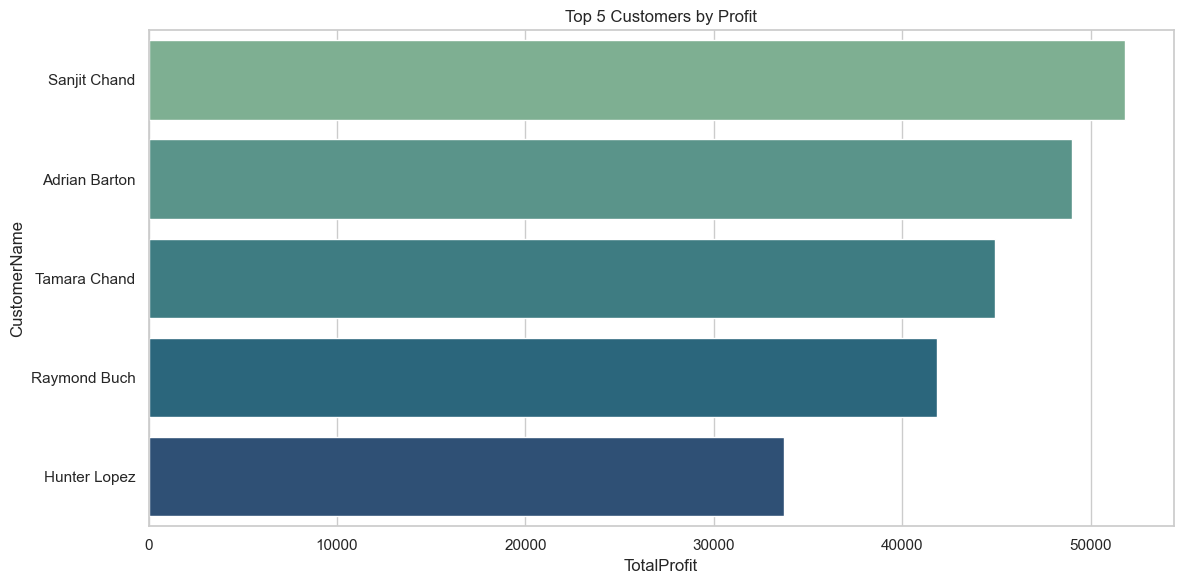

In [56]:
query = """
SELECT c.CustomerName, SUM(od.Profit) AS TotalProfit
FROM Order_Details od
JOIN Orders o ON od.OrderID = o.OrderID
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.CustomerName
ORDER BY TotalProfit DESC
LIMIT 5;
"""
df_top_customers = fetch_data(query)

sns.barplot(data=df_top_customers, x='TotalProfit', y='CustomerName', palette='crest')
plt.title('Top 5 Customers by Profit')
plt.tight_layout()
plt.show()


# 6. Sales vs Profit by Region
Some regions might generate high sales but low profit (or vice versa).

Insight: Optimize operations in low-profit regions or replicate strategies from high-profit ones.

C:\Users\PP\AppData\Local\Temp\ipykernel_6956\434498813.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


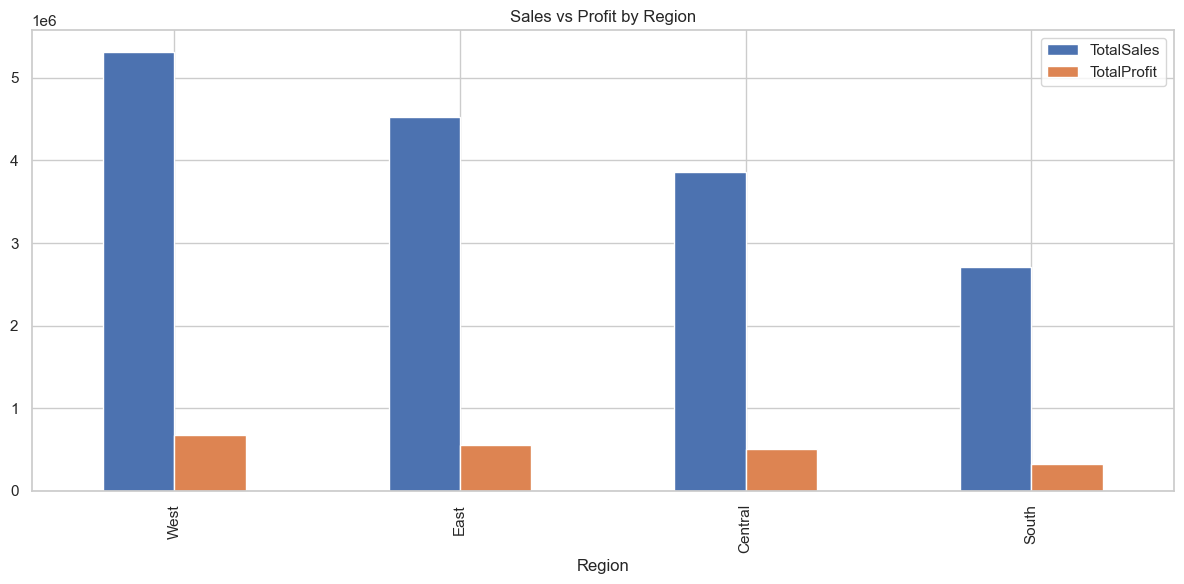

In [57]:
query = """
SELECT c.Region, SUM(od.Sales) AS TotalSales, SUM(od.Profit) AS TotalProfit
FROM Order_Details od
JOIN Orders o ON od.OrderID = o.OrderID
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.Region
ORDER BY TotalSales DESC;
"""
df_region = fetch_data(query)

df_region.plot(x='Region', kind='bar', y=['TotalSales', 'TotalProfit'])
plt.title('Sales vs Profit by Region')
plt.tight_layout()
plt.show()


# 📅 Time-Based Trends

## 8. Shipping Mode Analysis
Compares usage and profitability of shipping modes like "Standard Class", "First Class", etc.

Insight: Promote the shipping mode that offers the best balance of cost and customer satisfaction

C:\Users\PP\AppData\Local\Temp\ipykernel_6956\434498813.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)


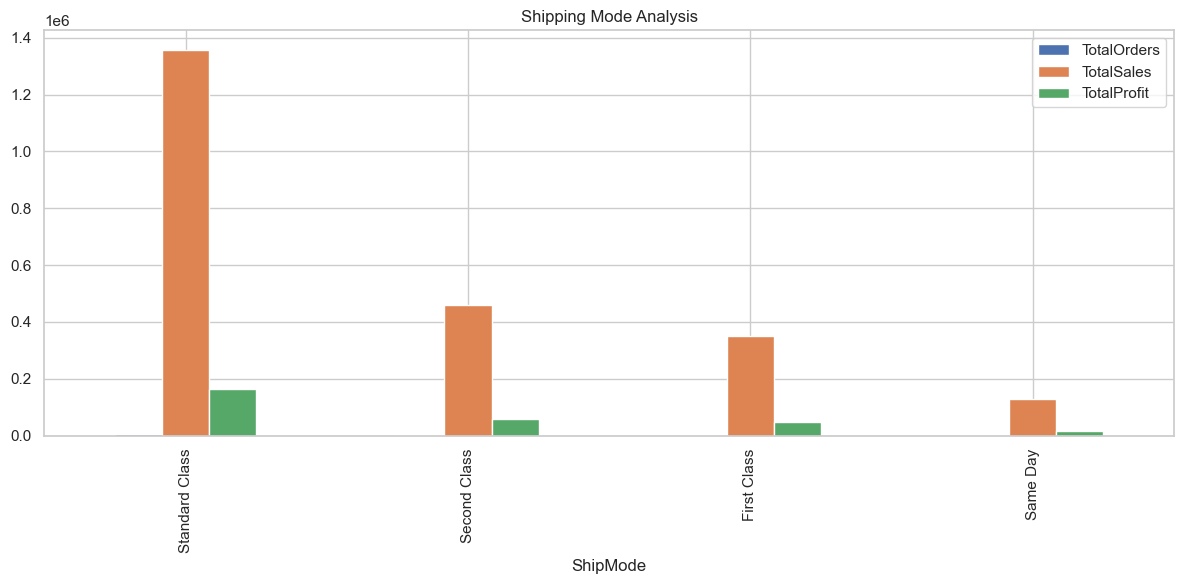

In [59]:
query = """
SELECT o.ShipMode, COUNT(*) AS TotalOrders, SUM(od.Sales) AS TotalSales, SUM(od.Profit) AS TotalProfit
FROM Order_Details od
JOIN Orders o ON od.OrderID = o.OrderID
GROUP BY o.ShipMode
ORDER BY TotalOrders DESC;
"""
df_ship = fetch_data(query)

df_ship.set_index('ShipMode')[['TotalOrders', 'TotalSales', 'TotalProfit']].plot(kind='bar')
plt.title('Shipping Mode Analysis')
plt.tight_layout()
plt.show()


In [60]:
conn.close()
